<a href="https://colab.research.google.com/github/JorgeRicardo6050/Tareas-IA-/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# --- 1. Cargar y Preparar los Datos ---
# Usaremos el famoso conjunto de datos Iris.
# Contiene medidas de 3 tipos de flores Iris.
# El objetivo es clasificar el tipo de flor basado en sus medidas.
iris = datasets.load_iris()
X = iris.data  # Características (sepal length, sepal width, petal length, petal width)
y = iris.target # Etiquetas (0, 1, 2 para los 3 tipos de Iris)

In [3]:
print("Dimensiones de las características (X):", X.shape)
print("Dimensiones de las etiquetas (y):", y.shape)
print("\nPrimeras 5 filas de características (X):")
print(X[:5])
print("\nPrimeras 5 etiquetas (y):")
print(y[:5])
print("-" * 50)

Dimensiones de las características (X): (150, 4)
Dimensiones de las etiquetas (y): (150,)

Primeras 5 filas de características (X):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Primeras 5 etiquetas (y):
[0 0 0 0 0]
--------------------------------------------------


In [4]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# train_size=0.7 significa 70% para entrenamiento, 30% para prueba
# random_state asegura que la división sea la misma cada vez que se ejecute
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("-" * 50)

Dimensiones de X_train: (105, 4)
Dimensiones de X_test: (45, 4)
--------------------------------------------------


In [6]:
# Escalar las características
# SVM es sensible a la escala de las características.
# StandardScaler normaliza los datos para que tengan media 0 y varianza 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Aprende los parámetros de escalado y los aplica al conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)       # Aplica los mismos parámetros de escalado al conjunto de prueba

In [7]:
print("Características de entrenamiento escaladas (primeras 5 filas):")
print(X_train_scaled[:5])
print("-" * 50)

Características de entrenamiento escaladas (primeras 5 filas):
[[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]]
--------------------------------------------------


--- 2. Crear y Entrenar el Modelo SVM ---
SVC es el clasificador de vectores de soporte (Support Vector Classifier)
kernel='linear': Usa un kernel lineal (para problemas linealmente separables)
kernel='rbf': Usa un kernel de función base radial (Gaussian RBF), muy común para problemas no lineales
C: Parámetro de regularización. Pequeño C -> más margin, más errores de clasificación (más simple). Grande C -> menos margin, menos errores (más complejo).

In [8]:
# Modelo con kernel lineal
svm_linear_model = SVC(kernel='linear', C=1)
print(f"Entrenando modelo SVM con kernel: {svm_linear_model.kernel}")
svm_linear_model.fit(X_train_scaled, y_train)
print("Modelo lineal entrenado.")
print("-" * 50)

Entrenando modelo SVM con kernel: linear
Modelo lineal entrenado.
--------------------------------------------------


In [9]:
# Modelo con kernel RBF (Radial Basis Function), muy común y potente para datos no lineales
svm_rbf_model = SVC(kernel='rbf', C=10, gamma='scale') # 'gamma' define la influencia de un solo ejemplo de entrenamiento. 'scale' usa 1 / (n_features * X.var())
print(f"Entrenando modelo SVM con kernel: {svm_rbf_model.kernel}")
svm_rbf_model.fit(X_train_scaled, y_train)
print("Modelo RBF entrenado.")
print("-" * 50)

Entrenando modelo SVM con kernel: rbf
Modelo RBF entrenado.
--------------------------------------------------


--- 3. Realizar Predicciones y Evaluar el Modelo ---

In [10]:
# Predicciones con el modelo lineal
y_pred_linear = svm_linear_model.predict(X_test_scaled)

In [11]:
print("Evaluación del Modelo SVM (Kernel LINEAL):")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred_linear):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_linear, target_names=iris.target_names))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_linear))
print("-" * 50)

Evaluación del Modelo SVM (Kernel LINEAL):
Precisión (Accuracy): 0.9778

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de Confusión:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
--------------------------------------------------


In [12]:
# Predicciones con el modelo RBF
y_pred_rbf = svm_rbf_model.predict(X_test_scaled)

In [13]:
print("Evaluación del Modelo SVM (Kernel RBF):")
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rbf, target_names=iris.target_names))
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred_rbf))
print("-" * 50)

Evaluación del Modelo SVM (Kernel RBF):
Precisión (Accuracy): 0.9778

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Matriz de Confusión:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
--------------------------------------------------


In [14]:
# --- 4. (Opcional) Visualización de los Vectores de Soporte ---
# Esto es más fácil de visualizar con solo 2 características.
# Vamos a usar solo las primeras dos características de Iris para el ejemplo visual.
X_2d = X[:, :2] # Sepal Length, Sepal Width
y_2d = y

In [15]:
# Volver a dividir y escalar solo las 2 características
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y_2d, test_size=0.3, random_state=42)
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

In [16]:
# Entrenar un SVM con kernel lineal en 2D
svm_2d_model = SVC(kernel='linear', C=1)
svm_2d_model.fit(X_train_2d_scaled, y_train_2d)

SVC(C=1, kernel='linear')

In [17]:
# Función para dibujar los límites de decisión
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Graficar puntos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k')

    # Graficar vectores de soporte (solo para SVC)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                facecolors='none', edgecolors='green', linewidths=2, label='Vectores de Soporte')

    plt.xlabel('Característica 1 (escalada)')
    plt.ylabel('Característica 2 (escalada)')
    plt.title(title)
    plt.legend()
    plt.show()

Visualizando el modelo SVM lineal con 2 características...


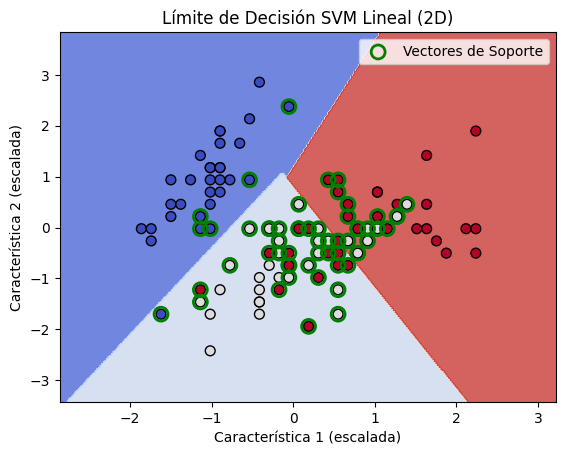

In [18]:
# Visualizar el modelo lineal en 2D
print("Visualizando el modelo SVM lineal con 2 características...")
plot_decision_boundary(X_train_2d_scaled, y_train_2d, svm_2d_model, 'Límite de Decisión SVM Lineal (2D)')